# Homework 2 (kny4)

## Classifier

In [342]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import*

In [343]:
path = '/home/kny4/cs344/buildings'

In [344]:
img = get_image_files(path)

In [345]:
build = DataBlock(
blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.6, seed=40),
    get_y=parent_label,
    item_tfms=Resize(128))

In [346]:
dls = build.dataloaders(path)

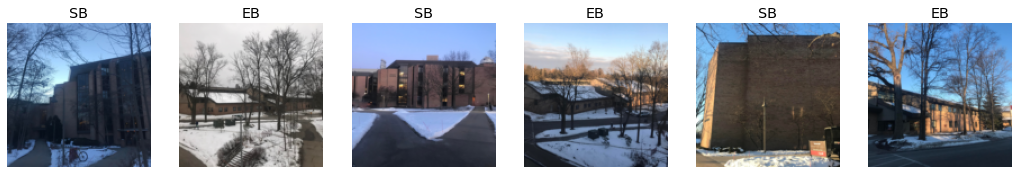

In [347]:
dls.valid.show_batch(max_n=6, nrows=1)

In [348]:
build = build.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = build.dataloaders(path)

In [349]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,nan,0.895349,0.500000,00:02


/opt/anaconda/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,0.895349,0.500000,00:01
1,nan,0.895349,0.500000,00:01
2,nan,0.895349,0.500000,00:01
3,nan,0.895349,0.500000,00:01


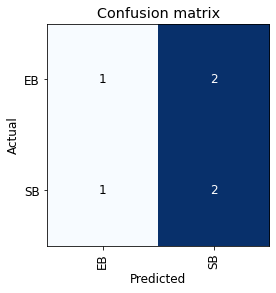

In [350]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

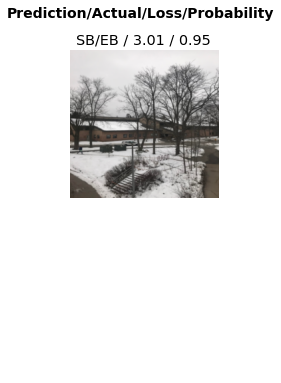

In [351]:
interp.plot_top_losses(1, nrows=2)

In [352]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [353]:
learn.export()

In [354]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [355]:
learn_inf = load_learner(path/'export.pkl')

In [356]:
learn_inf.predict('/home/kny4/Desktop/eb_1.jpg')

('SB', TensorBase(1), TensorBase([0.4440, 0.5560]))

In [357]:
learn_inf.dls.vocab

['EB', 'SB']

In [358]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [359]:
img = PILImage.create(btn_upload.data[-1])

In [360]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [361]:
pred,pred_idx,probs = learn_inf.predict(img)

In [362]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: SB; Probability: 0.5560')

In [363]:
btn_run = widgets.Button(description='Classify')

In [364]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [365]:
btn_upload = widgets.FileUpload()

In [366]:
VBox([widgets.Label('Select your building!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

## Evaluation Questions

- How accurate is your classifier? Report your answer as a range (lower to upper) of expected accuracy values.
    - **The classifier reports between 55% and 65% in probability.**
- What sort of mistakes did it make? Why do you think it may have made those mistakes?
    - **It classified both test images incorrectly. One of the images does not have snow like thw valid pictures do. Perhaps this is one of the issues with the classifier.**
- How many images do you need to get good accuracy? (Try your classifier on fewer images.)
    - **To get good accuracy, the classifier needed about 3 images (of varying angles and distances).**
- What choices did you have to make in the process of collecting data, processing it, and analyzing the results?
    - What are one or two choices that you could have made differently?
        - **I decided the angles that the validation pictures were at, but could not control the weather (snow on the ground) scenario that may have affected the classifier. I would have taken more photos from even more angles of the building.**
    - What do you expect would be different if you made that different choice?
        - **I expect that the classifier would be able to distinguish the buildings better, regardless of the non-building components in the pictures.**